In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np



In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# tensorflow with cuda

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

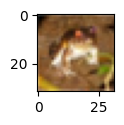

In [12]:
plot_sample(0)

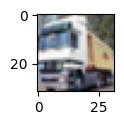

In [13]:
plot_sample(1)

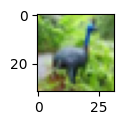

In [14]:
plot_sample(6)

In [15]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

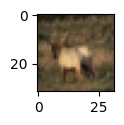

In [16]:
plot_sample(3)

In [17]:
y_train[3]

array([4], dtype=uint8)

In [18]:
classes[y_train[3][0]]

'deer'

In [19]:
X_train[0]/255   # range 0 to 5

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [20]:
# to range in 0 to 1

In [21]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [22]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [23]:
# categorical

In [24]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [25]:
from tensorflow.keras.utils import to_categorical  # or keras.utils if standalone keras

y_train_categorical = to_categorical(y_train, num_classes=10)
y_train_categorical = y_train_categorical.astype('float32')  # If you still want float32

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
from tensorflow.keras.utils import to_categorical  # or keras.utils if standalone keras

# Convert without dtype
y_test_categorical = to_categorical(y_test, num_classes=10)

# If you want float32
y_test_categorical = y_test_categorical.astype('float32')


In [27]:
X_train.shape

(50000, 32, 32, 3)

In [28]:
# hiddden layer
32*32*3

3072

In [29]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
model=keras.Sequential([
    # pass neural network layers
    keras.layers.Flatten(input_shape=(32,32,3)),

    # more hidden layers more helpful
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),

    keras.layers.Dense(10,activation='sigmoid')
])

# complie model
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=55)


 # sparse vs categorical
 # sparse is for discrete

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3044 - loss: 1.9335
Epoch 2/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4204 - loss: 1.6442
Epoch 3/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4512 - loss: 1.5555
Epoch 4/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4746 - loss: 1.4895
Epoch 5/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4945 - loss: 1.4363
Epoch 6/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5097 - loss: 1.3940
Epoch 7/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5277 - loss: 1.3580
Epoch 8/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5358 - loss: 1.3182
Epoch 9/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5463 - loss: 1.2903
Epoch 10/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5611 - loss: 1.2468
Epoch 11/55
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5709 - loss: 1.2171
Epoch 12/55
1563/1563 ━━━━━━

In [31]:
model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.0446719e-01, 6.2042642e-01, 3.6863261e-01, ..., 4.8795869e-04,
        6.3967085e-01, 1.1556989e-01],
       [9.1916758e-01, 9.9783713e-01, 7.2256379e-02, ..., 7.1475223e-02,
        9.9999642e-01, 9.9898285e-01],
       [9.9777478e-01, 9.1266632e-01, 3.7549239e-01, ..., 8.8051903e-01,
        9.9837863e-01, 7.5216860e-01],
       ...,
       [2.9519871e-01, 2.9148904e-03, 9.8115152e-01, ..., 6.6420954e-01,
        6.8284571e-01, 1.8108308e-02],
       [8.7396520e-01, 1.1314739e-01, 7.4778384e-01, ..., 2.9024953e-01,
        1.5131485e-01, 3.3571015e-03],
       [5.9883874e-02, 2.5576467e-02, 8.3294594e-01, ..., 9.4537479e-01,
        1.8626195e-01, 5.6559068e-01]], dtype=float32)

In [32]:
classes[y_test[0][0]]

'cat'

In [34]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'cat'

In [35]:
classes[y_test[1][0]]

'ship'

In [37]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(8)

In [39]:
def get_model():
  model=keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(3000,activation='relu'),
      keras.layers.Dense(1000,activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')
  ])

  model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [41]:
with tf.device('/CPU:0'):
  cpu_model=get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical,epochs=4)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 70ms/step - accuracy: 0.3082 - loss: 1.9320
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 70ms/step - accuracy: 0.4237 - loss: 1.6420
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 69ms/step - accuracy: 0.4489 - loss: 1.5517
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 69ms/step - accuracy: 0.4745 - loss: 1.4881


In [42]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model=get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical,epochs=4)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3031 - loss: 1.9313
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4200 - loss: 1.6395
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4506 - loss: 1.5527
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4740 - loss: 1.4880
33 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
